In [156]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests as req
import json

In [157]:
# Pull in the Housing Data CSV file
csv_path = "HousingDataClean_NoNational.csv"
housing_df = pd.read_csv(csv_path)
housing_df.head()

,City,Homes Sold,Inventory,Median Dom,Median List Price,Median Sale Price,New Listings,Period Begin,Period Duration,Period End,Price Drops,Property Type,Region
0,Chicago,2098,10078,86,249900.0,215000,2887,1/1/16,30,1/31/16,0.142985,All Residential,"Chicago, IL"
1,Chicago,1876,10969,84,283450.0,225000,4130,2/1/16,30,2/29/16,0.146868,All Residential,"Chicago, IL"
2,Chicago,2393,11762,79,289900.0,250000,4835,3/1/16,30,3/31/16,0.165023,All Residential,"Chicago, IL"
3,Chicago,2908,12285,60,285000.0,270000,4809,4/1/16,30,4/30/16,0.167114,All Residential,"Chicago, IL"
4,Chicago,3204,12723,56,284450.0,285000,4778,5/1/16,30,5/31/16,0.179203,All Residential,"Chicago, IL"


In [158]:
# Pull in the Weather Data CSV file
csv_path1 = "WeatherDataClean.csv"
weather_df = pd.read_csv(csv_path1)
weather_df.head()

,City,High,Average Temp,Low,Period
0,Chicago,48,25,-4,1/1/16
1,Chicago,62,31,2,2/1/16
2,Chicago,70,44,11,3/1/16
3,Chicago,83,48,22,4/1/16
4,Chicago,87,60,35,5/1/16


In [159]:
merged_df = pd.concat([housing_df, weather_df], axis=1)
merged_df.head()

,City,Homes Sold,Inventory,Median Dom,Median List Price,Median Sale Price,New Listings,Period Begin,Period Duration,Period End,Price Drops,Property Type,Region,City,High,Average Temp,Low,Period
0,Chicago,2098,10078,86,249900.0,215000,2887,1/1/16,30,1/31/16,0.142985,All Residential,"Chicago, IL",Chicago,48,25,-4,1/1/16
1,Chicago,1876,10969,84,283450.0,225000,4130,2/1/16,30,2/29/16,0.146868,All Residential,"Chicago, IL",Chicago,62,31,2,2/1/16
2,Chicago,2393,11762,79,289900.0,250000,4835,3/1/16,30,3/31/16,0.165023,All Residential,"Chicago, IL",Chicago,70,44,11,3/1/16
3,Chicago,2908,12285,60,285000.0,270000,4809,4/1/16,30,4/30/16,0.167114,All Residential,"Chicago, IL",Chicago,83,48,22,4/1/16
4,Chicago,3204,12723,56,284450.0,285000,4778,5/1/16,30,5/31/16,0.179203,All Residential,"Chicago, IL",Chicago,87,60,35,5/1/16


In [160]:
merged_df["Index"]=""
merged_df.head()

,City,Homes Sold,Inventory,Median Dom,Median List Price,Median Sale Price,New Listings,Period Begin,Period Duration,Period End,Price Drops,Property Type,Region,City,High,Average Temp,Low,Period,Index
0,Chicago,2098,10078,86,249900.0,215000,2887,1/1/16,30,1/31/16,0.142985,All Residential,"Chicago, IL",Chicago,48,25,-4,1/1/16,
1,Chicago,1876,10969,84,283450.0,225000,4130,2/1/16,30,2/29/16,0.146868,All Residential,"Chicago, IL",Chicago,62,31,2,2/1/16,
2,Chicago,2393,11762,79,289900.0,250000,4835,3/1/16,30,3/31/16,0.165023,All Residential,"Chicago, IL",Chicago,70,44,11,3/1/16,
3,Chicago,2908,12285,60,285000.0,270000,4809,4/1/16,30,4/30/16,0.167114,All Residential,"Chicago, IL",Chicago,83,48,22,4/1/16,
4,Chicago,3204,12723,56,284450.0,285000,4778,5/1/16,30,5/31/16,0.179203,All Residential,"Chicago, IL",Chicago,87,60,35,5/1/16,


In [161]:
merged_df["Index"] = merged_df["Homes Sold"]/merged_df["Median Dom"]
merged_df["Index"] = merged_df["Index"].astype(int)
merged_df

,City,Homes Sold,Inventory,Median Dom,Median List Price,Median Sale Price,New Listings,Period Begin,Period Duration,Period End,Price Drops,Property Type,Region,City,High,Average Temp,Low,Period,Index
0,Chicago,2098,10078,86,249900.0,215000,2887,1/1/16,30,1/31/16,0.142985,All Residential,"Chicago, IL",Chicago,48,25,-4,1/1/16,24
1,Chicago,1876,10969,84,283450.0,225000,4130,2/1/16,30,2/29/16,0.146868,All Residential,"Chicago, IL",Chicago,62,31,2,2/1/16,22
2,Chicago,2393,11762,79,289900.0,250000,4835,3/1/16,30,3/31/16,0.165023,All Residential,"Chicago, IL",Chicago,70,44,11,3/1/16,30
3,Chicago,2908,12285,60,285000.0,270000,4809,4/1/16,30,4/30/16,0.167114,All Residential,"Chicago, IL",Chicago,83,48,22,4/1/16,48
4,Chicago,3204,12723,56,284450.0,285000,4778,5/1/16,30,5/31/16,0.179203,All Residential,"Chicago, IL",Chicago,87,60,35,5/1/16,57
5,Chicago,3692,12990,54,274724.0,280000,4669,6/1/16,30,6/30/16,0.206236,All Residential,"Chicago, IL",Chicago,93,72,51,6/1/16,68
6,Chicago,3343,13054,56,274000.0,290000,4092,7/1/16,30,7/31/16,0.199326,All Residential,"Chicago, IL",Chicago,93,76,54,7/1/16,59
7,Chicago,3628,12691,61,259900.0,270000,3902,8/1/16,30,8/31/16,0.214798,All Residential,"Chicago, IL",Chicago,92,76,56,8/1/16,59
8,Chicago,3020,12853,63,277450.0,257000,3821,9/1/16,30,9/30/16,0.227262,All Residential,"Chicago, IL",Chicago,91,70,50,9/1/16,47
9,Chicago,2660,12356,65,250000.0,252000,3109,10/1/16,30,10/31/16,0.210991,All Residential,"Chicago, IL",Chicago,82,57,36,10/1/16,40


In [162]:
# Create different tables for each city data so we can plot them on top of each other
chicago_data = merged_df[merged_df['Region'] == 'Chicago, IL']
dc_data = merged_df[merged_df['Region'] == 'Washington, DC']
denver_data = merged_df[merged_df['Region'] == 'Denver, CO']
dallas_data = merged_df[merged_df['Region'] == 'Dallas, TX']
san_diego_data = merged_df[merged_df['Region'] == 'San Diego, CA']

In [163]:
plt.scatter(chicago_data["Average Temp"],
           chicago_data["Index"], c="red",
                edgecolor ="black",
               linewidths=1, marker="o", alpha=0.8, label="Chicago")

plt.scatter(dc_data["Average Temp"],
           dc_data["Index"], c="blue",
                edgecolor ="black",
               linewidths=1, marker="o", alpha=0.8, label="DC")

plt.scatter(denver_data["Average Temp"],
           denver_data["Index"],c="green",
                edgecolor ="black",
               linewidths=1, marker="o", alpha=0.8, label="Denver")

plt.scatter(dallas_data["Average Temp"],
           dallas_data["Index"], c="purple",
                edgecolor ="black",
               linewidths=1, marker="o", alpha=0.8, label="Dallas")

plt.scatter(san_diego_data["Average Temp"],
           san_diego_data["Index"],c="yellow",
                edgecolor ="black",
               linewidths=1, marker="o", alpha=0.8, label="San Diego")


plt.xlim(15,95)
lgnd = plt.legend(fontsize="large",mode = "Expanded",
                 numpoints=1, scatterpoints=1, fancybox=True,
                 loc=2, title="Cities",
                 labelspacing=1)

In [164]:
# calc the trendline
x = np.array(merged_df["Average Temp"])
y = np.array(merged_df["Index"])
z = np.polyfit(x , y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
# the line equation:
#print "y=%.6fx+(%.6f)" %(z[0],z[1])

In [165]:
plt.xlabel('Average Temperature')
plt.ylabel('Index')
plt.title('How Temperature Affects Transaction Volume')
plt.grid(True)

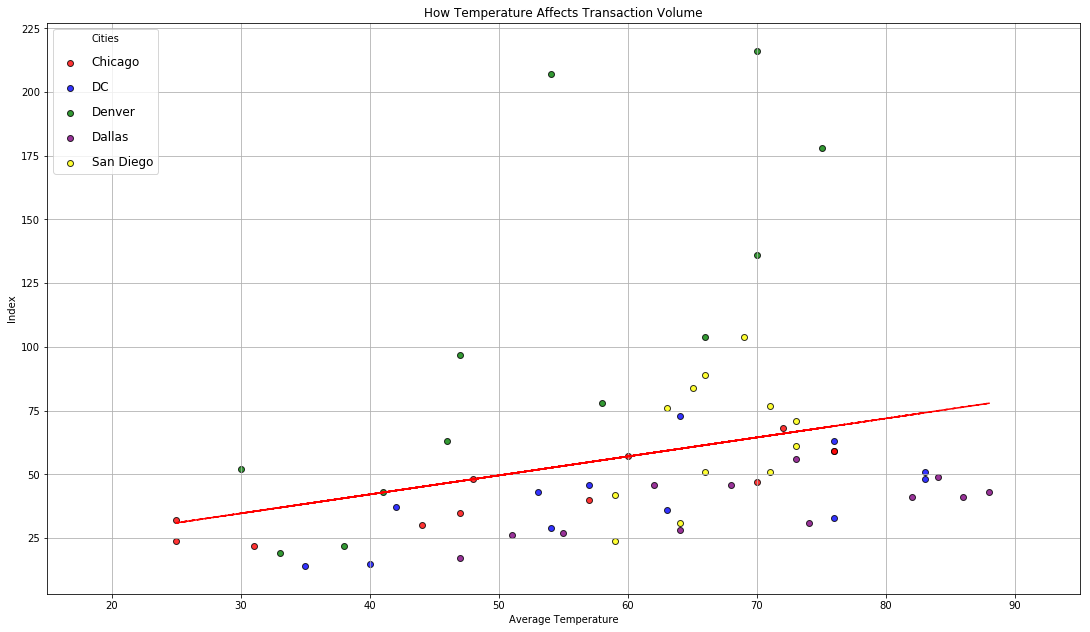

In [166]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('Temp vs. Home Sales.jpg', dpi=100)
plt.show()

In [152]:
# *** IGNORE BELOW *** IGNORE BELOW *** IGNORE BELOW *** IGNORE BELOW *** 

In [153]:
# *** IGNORE BELOW *** IGNORE BELOW *** IGNORE BELOW *** IGNORE BELOW *** 

In [154]:
"""# How does temperature affect home sale/purchase volume? (Cyrus)
# x_axis: Temperature (Deg F); y_axis: Index (Index = Homes Sold/DoM)"""

'# How does temperature affect home sale/purchase volume? (Cyrus)\n# x_axis: Temperature (Deg F); y_axis: Index (Index = Homes Sold/DoM)'

In [155]:
""""#graph
merged_df.plot(kind="scatter", x="Average Temp", y="Index", grid=True, figsize=(20,10),
              title="Temperature vs. Home Sales")
# calc the trendline
x = np.array(merged_df["Average Temp"])
y = np.array(merged_df["Index"])
z = np.polyfit(x , y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
# the line equation:
#print "y=%.6fx+(%.6f)" %(z[0],z[1])""""

SyntaxError: EOL while scanning string literal (<ipython-input-155-d39586141cf7>, line 11)

In [107]:
"""# Save an image of the chart and print to screen
plt.savefig("Temp vs. Home Sales.jpg")
plt.show()"""

'# Save an image of the chart and print to screen\nplt.savefig("Temp vs. Home Sales.jpg")\nplt.show()'